In [85]:
import pandas as pd

import numpy as np
import random
import string
import os
print(os.getcwd())
import tensorflow as tf
import tensorflow.keras as ks
def random_string(n=8):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=n))


##df.head(100)
#df.info()
#df= pd.DataFrame('/cs1/employees_eda.csv')
#df.describe()
#df.shape
#df.head(10)

#df.tail(10)
#df.ffill()

#df = df.replace(r'^\s*$', np.nan, regex=True)
#df['transaction_id'].isnan()

#df = df.applymap(lambda x: random_string() if pd.isna(x) else x)
df.isna().sum().sum()#/4489
df.size  #72240



/Users/ajaikolarikal/PyCharmMiscProject/EDA


72240

In [58]:
df.isna().sum()

transaction_id               0
date                         0
region                       0
city                         0
outlet_type                  0
sales_channel                0
customer_type                0
brand                        0
pack_size_ml                 0
pack_type                    0
promo_flag                   0
promo_type                1986
discount_pct                90
competitor_price_index      92
units_sold                   0
base_price_per_unit          0
gross_sales_value            0
net_sales_value              0
stock_at_start               0
stock_at_end                 0
oos_flag                     0
weather                     91
temp_c                      90
event                     2140
dtype: int64

In [56]:
df.head(100)
df.columns

Index(['transaction_id', 'date', 'region', 'city', 'outlet_type',
       'sales_channel', 'customer_type', 'brand', 'pack_size_ml', 'pack_type',
       'promo_flag', 'promo_type', 'discount_pct', 'competitor_price_index',
       'units_sold', 'base_price_per_unit', 'gross_sales_value',
       'net_sales_value', 'stock_at_start', 'stock_at_end', 'oos_flag',
       'weather', 'temp_c', 'event'],
      dtype='object')

In [48]:
df = df.applymap(lambda x: random_string() if pd.isna(x) else x)
df.isna().sum().sum()#/4489
#df.head()


/var/folders/bp/zhhmsgsj5wqc3mcx7hb1mkw40000gn/T/ipykernel_81911/3455973087.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: random_string() if pd.isna(x) else x)


np.int64(0)

In [49]:
df['promo_type']
#df.describe()

#df.isna().sum()

# -----------------------------
# 5. Descriptive Statistics
# -----------------------------
print("\n🔹 Numerical Summary:")
print(df.describe())

print("\n🔹 Categorical Summary:")
print(df.describe(include="object"))



🔹 Numerical Summary:
       pack_size_ml   promo_flag   units_sold  base_price_per_unit  \
count   3010.000000  3010.000000  3010.000000          3010.000000   
mean     616.023256     0.353821    55.837874           181.634312   
std      244.188075     0.478234    31.233960            42.941557   
min      330.000000     0.000000     0.000000           101.550000   
25%      500.000000     0.000000    34.000000           149.150000   
50%      500.000000     0.000000    49.000000           177.620000   
75%      650.000000     1.000000    70.000000           205.787500   
max     1000.000000     1.000000   460.000000           319.380000   

       gross_sales_value  net_sales_value  stock_at_start  stock_at_end  \
count        3010.000000      3010.000000     3010.000000   3010.000000   
mean        10193.320405      9302.185603       88.505316     35.260797   
std          6544.633676      5932.082417       45.630790     21.526771   
min             0.000000         0.000000      

In [80]:
# -----------------------------
# 7. Zero Values Check
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
print((df == 0).sum())

# -----------------------------
# 8. Correlation Matrix
# -----------------------------
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Compute correlation
corr = numeric_df.corr()

# Set a threshold for "good" correlations
threshold = 0.5  # you can change this

# Filter correlations above threshold (absolute value)
strong_corr = corr[(np.abs(corr) > threshold) & (corr != 1.0)]

cols_with_corr = strong_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

print(cols_with_corr.columns)
print(cols_with_corr.index)
df2=df[cols_with_corr.columns]
df2

#plt.figure(figsize=(10, 6))
#sns.heatmap(strong_corr, annot=True, cmap="Blues")
#plt.title("Correlation Heatmap")
#plt.show()

transaction_id               0
date                         0
region                       0
city                         0
outlet_type                  0
sales_channel                0
customer_type                0
brand                        0
pack_size_ml                 0
pack_type                    0
promo_flag                1945
promo_type                   0
discount_pct                15
competitor_price_index       0
units_sold                   1
base_price_per_unit          0
gross_sales_value            1
net_sales_value              1
stock_at_start               0
stock_at_end                 0
oos_flag                  3010
weather                      0
temp_c                       0
event                        0
dtype: int64
Index(['pack_size_ml', 'promo_flag', 'discount_pct', 'units_sold',
       'base_price_per_unit', 'gross_sales_value', 'net_sales_value',
       'stock_at_start', 'stock_at_end'],
      dtype='object')
Index(['pack_size_ml', 'promo_flag', 'disc

,pack_size_ml,promo_flag,discount_pct,units_sold,base_price_per_unit,gross_sales_value,net_sales_value,stock_at_start,stock_at_end
0,500,0,0.039,72,123.37,8882.76,8538.39,110,45
1,330,1,0.215,96,106.70,10243.49,8039.50,147,56
2,650,1,0.261,79,143.69,11351.29,8391.16,134,58
3,500,0,NaN,38,189.54,7202.61,7148.34,66,35
4,1000,0,0.017,39,206.24,8043.20,7906.33,64,25
...,...,...,...,...,...,...,...,...,...
3005,330,0,0.032,24,143.66,3447.75,3338.43,41,22
3006,1000,1,0.278,89,273.24,24318.03,17551.06,160,71
3007,1000,0,0.018,47,280.00,13159.91,12920.55,64,18
3008,330,1,0.259,41,167.42,6864.16,5085.06,71,28


<Axes: xlabel='net_sales_value', ylabel='Count'>

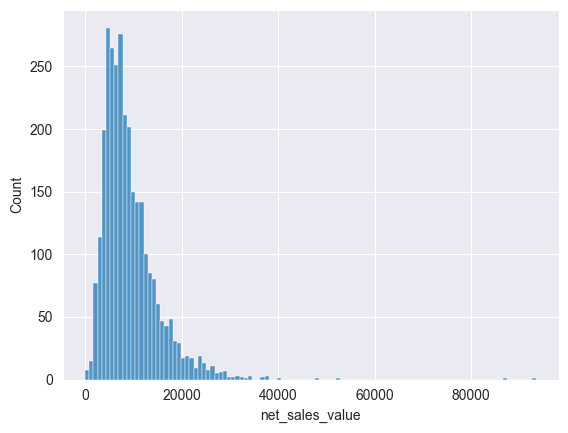

In [62]:
sns.histplot(df,x='net_sales_value')

In [69]:
df1=df[df['net_sales_value']>40000]
df2=df1[['discount_pct','promo_type']]
df1

#print(df2)

     transaction_id        date region        city     outlet_type  \
608      TXN_000609  2024-12-16  South     Chennai     Supermarket   
694      TXN_000695  2024-12-20  North  Chandigarh     Supermarket   
776      TXN_000777  2024-01-01  North       Delhi     Supermarket   
2100     TXN_002101  2024-12-29   East     Kolkata  Bar/Restaurant   

     sales_channel      customer_type       brand  pack_size_ml pack_type  \
608      Off-Trade  Independent Store    Heineken          1000    Bottle   
694      Off-Trade       Retail Chain    Heineken           650    Bottle   
776      Off-Trade       Retail Chain  Kingfisher          1000    Bottle   
2100      On-Trade  Independent Store    Heineken           650     Draft   

      ...  units_sold base_price_per_unit  gross_sales_value  net_sales_value  \
608   ...         200              265.73           53146.00        52029.934   
694   ...         460              205.65           94599.00        93463.812   
776   ...         39

<Axes: xlabel='city', ylabel='net_sales_value'>

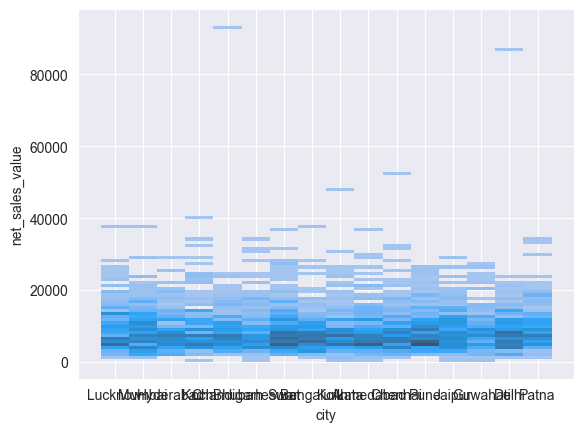

In [70]:
sns.histplot(df,x='city',y='net_sales_value')